# MVP - Pós Graduação em Engenharia de Software (PUC Rio)
# Sprint Qualidade de Software, Segurança e Sistemas Inteligentes

O objetivo desse notebook é explorar os dados recebidos em uma pesquisa de satisfação realizada com passageiros de uma companhia aérea e treinar um modelo de Machine Learning para classificar a satisfação dos passageiros com base nas respostas da pesquisa.

Colunas do dataset:

- Gender: Gênero dos passageiros (Female, Male)
- Customer Type: Cliente com plano de fidelidade ou não(Loyal customer, disloyal customer)
- Age: Idade dos passageiros
- Type of Travel: Propósito da viagem (Personal Travel, Business Travel)
- Class: Classe (Business, Eco, Eco Plus)
- Flight distance: Distância total do vôo
- Inflight wifi service: Nota para o serviço de internet a bordo (0:Not Applicable;1-5)
- Departure/Arrival time convenient: Nota para o horário do vôo
- Ease of Online booking: Nível de satisfação com a compra da passagem
- Gate location: Nível de satisfação com a localização do portão
- Food and drink: Nível de satisfação com os lanches servidos a bordo
- Online boarding: Nível de satisfação com o check in online
- Seat comfort: Nível de satisfação com os assentos
- Inflight entertainment: Nota para os serviços de mídia e entretenimento a bordo
- On-board service: Satisfação com o embarque
- Leg room service: Satisfação com o espaço para as pernas entre as poltronas
- Baggage handling: Nota para o cuidado com as bagagens
- Check-in service: Satisfação com o serviço de check in
- Inflight service: Satisfação com o serviço de bordo
- Cleanliness: Nota para a limpeza do avião
- Departure Delay in Minutes: Minutos de atraso na decolagem
- Arrival Delay in Minutes: Minutos de atraso no pouso
- Satisfaction: Nível de satisfação com a companhia aérea(Satisfaction, neutral or dissatisfaction)

In [1]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline

url = "https://media.githubusercontent.com/media/NephilimJaeger/mvp-model-fullstack/main/data/passenger_satisfaction.csv"

data = pd.read_csv(url, delimiter=',')

## Explorando os dados

Carga

In [2]:
url = "https://media.githubusercontent.com/media/NephilimJaeger/mvp-model-fullstack/main/data/passenger_satisfaction.csv"
data = pd.read_csv(url, delimiter=',')
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [3]:
#Tipos dos dados, quantidade de linhas, quantidade de colunas e quantidade de dados não nulos por coluna
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      1298

In [4]:
#Checando a quantidade de dados nulos
null_qnty = data.isnull().sum().to_frame('Missing Values')
null_qnty

,Missing Values
Unnamed: 0,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0


In [5]:
# Procurando por dados duplicados
has_duplicates = data.duplicated().any()
print(has_duplicates)

False


In [6]:
#Estatísticas básicas sobre os dados
data.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,44158.700000,64940.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,31207.377062,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16234.750000,32470.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,38963.500000,64940.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,71433.250000,97410.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


## Limpeza e preparação

In [7]:
# As duas primeiras colunas não contém dados relevantes para o treino do modelo
data = data.drop(data.iloc[:,[0, 1]], axis = 1)

In [8]:
#Preenchendo os valores nulos com a mediana dos dados
data['Arrival Delay in Minutes'].fillna(data['Arrival Delay in Minutes'].median(axis = 0), inplace = True)

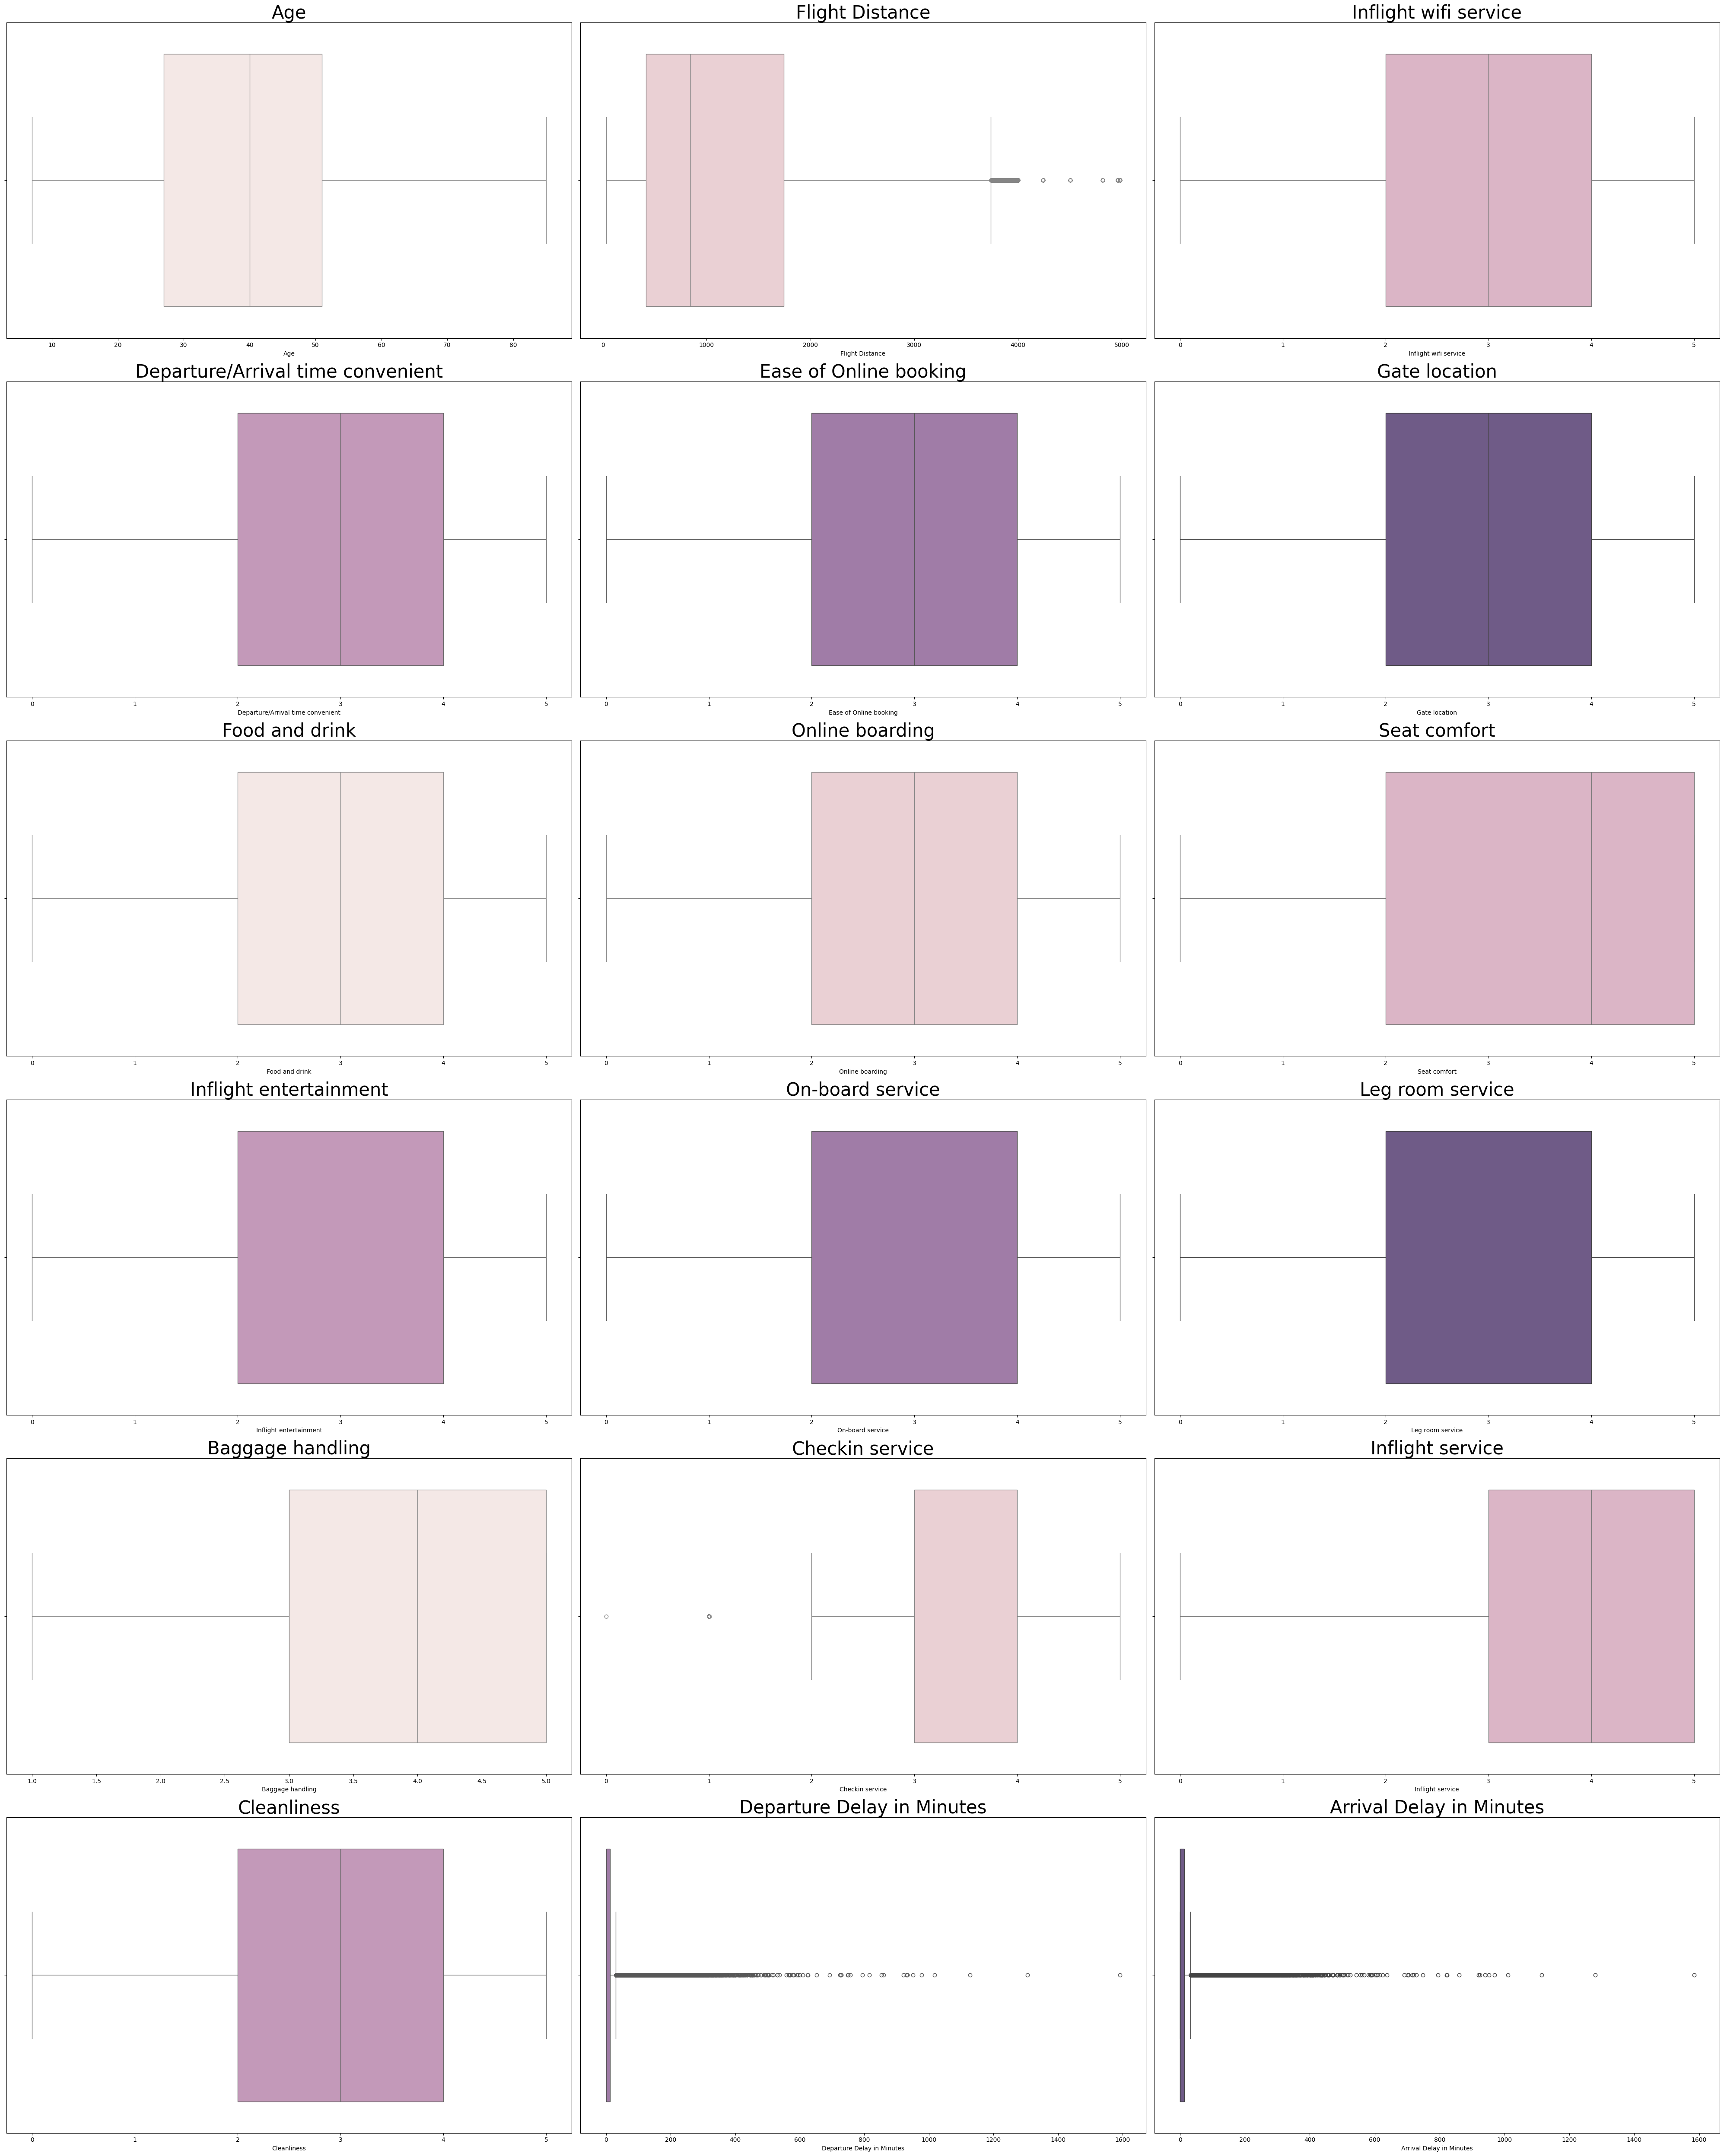

In [9]:
#Procurando por outliers
numerical = data.select_dtypes(include=['int', 'float']).copy()
rows, cols = 6, 3
cube_palette = sns.cubehelix_palette(gamma=.5)

fig, axes = plt.subplots(rows, cols, figsize=(40, 50))
axes = axes.flatten()

for i, col in enumerate(numerical.columns):
    if i < len(axes):
        sns.boxplot(x=data[col], ax=axes[i], color=cube_palette[i % len(cube_palette)])
        axes[i].set_title(col, fontsize=30)

plt.tight_layout()
plt.show()

In [10]:
# Como pôde ser visto no output da célula anterior, temos outliers nas colunas 'Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes'
# Os valores serão removidos pela função abaixo
def handle_outliers(df, columns):
    
    """ Remove outliers do dataframe """

    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

    return df

columns_to_handel= ['Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']
data = handle_outliers(data, columns_to_handel)

### Modelagem

In [11]:
#Transformando as variáveis categóricas em numéricas
data = pd.get_dummies(data, drop_first=True,dtype=int)

In [12]:
data.columns

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Gender_Male', 'Customer Type_disloyal Customer',
       'Type of Travel_Personal Travel', 'Class_Eco', 'Class_Eco Plus',
       'satisfaction_satisfied'],
      dtype='object')

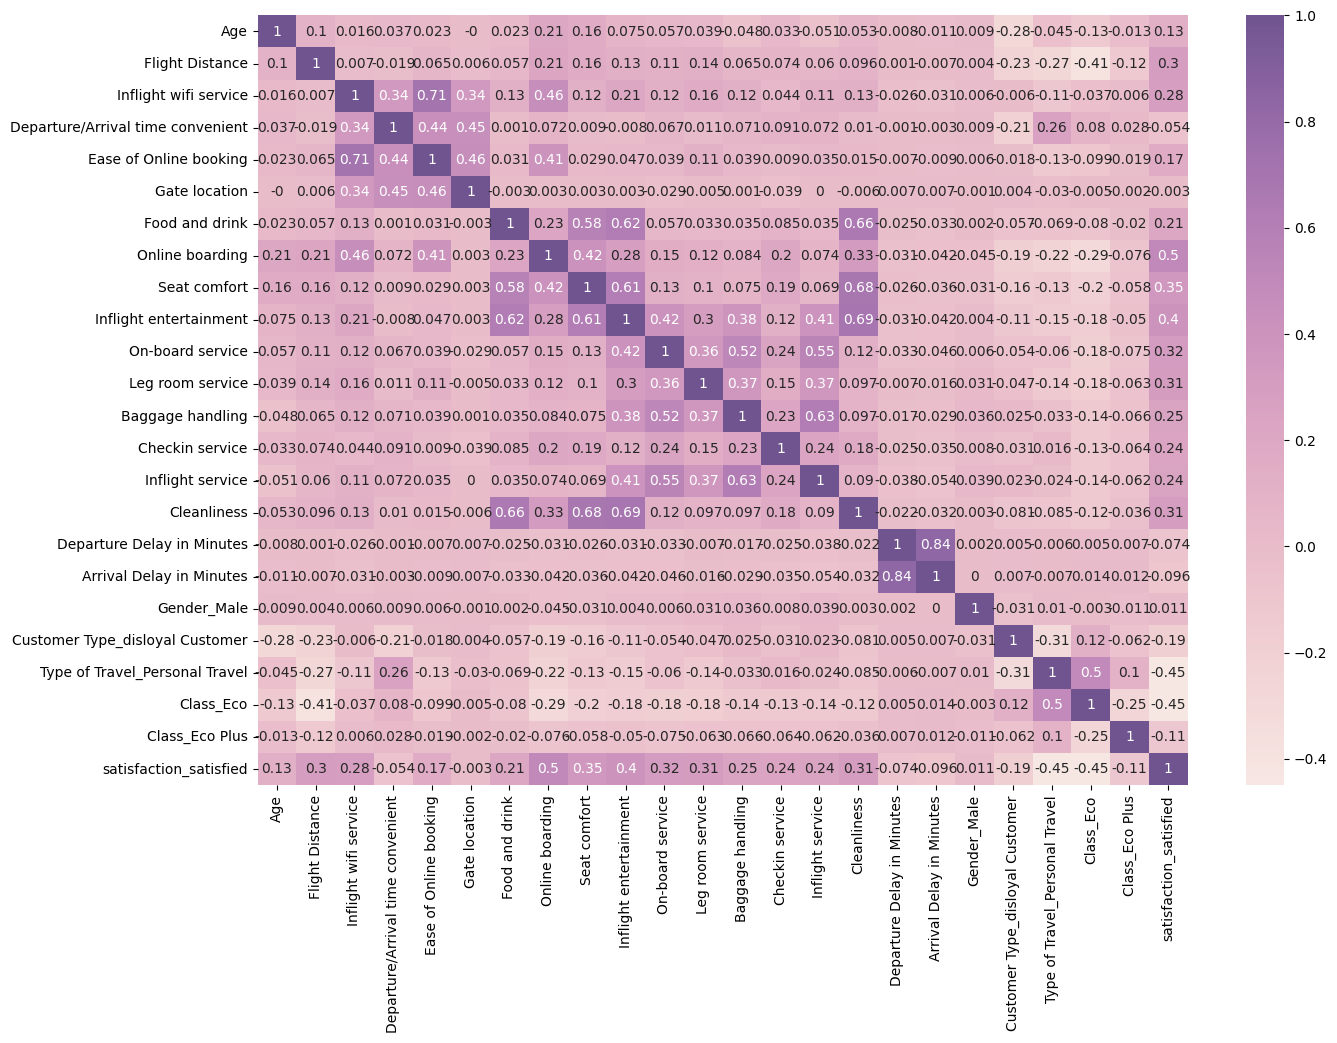

In [13]:
#correlação entre as variáveis
numeric_df = data.select_dtypes(include='number')
plt.figure(figsize=(15, 10))
cube_palette = sns.cubehelix_palette(gamma=.5, as_cmap=True)
sns.heatmap(round(numeric_df.corr(), 3), annot=True, cmap=cube_palette)

plt.show()

In [14]:
#Correlação entre outras variáveis e a variável target
correlation_matrix = data.corr()
correlation_ordered = correlation_matrix["satisfaction_satisfied"].sort_values(ascending=False)
print(correlation_ordered)

satisfaction_satisfied               1.000000
Online boarding                      0.501749
Inflight entertainment               0.398234
Seat comfort                         0.348829
On-board service                     0.322205
Leg room service                     0.312424
Cleanliness                          0.307035
Flight Distance                      0.298730
Inflight wifi service                0.283460
Baggage handling                     0.248680
Inflight service                     0.244918
Checkin service                      0.237252
Food and drink                       0.211340
Ease of Online booking               0.168877
Age                                  0.134091
Gender_Male                          0.011236
Gate location                       -0.002793
Departure/Arrival time convenient   -0.054270
Departure Delay in Minutes          -0.074264
Arrival Delay in Minutes            -0.096418
Class_Eco Plus                      -0.106034
Customer Type_disloyal Customer   

In [15]:
# Vamos manter as variáveis que possuem correlação maior que 0.2 absoluto com a variável target
threshold = 0.2
columns_to_keep = correlation_matrix['satisfaction_satisfied'].abs() > threshold
columns_to_keep['satisfaction_satisfied'] = True
columns_to_keep = columns_to_keep[columns_to_keep].index
data = data[columns_to_keep]

#### Treino e validação do modelo

In [16]:
# Separando o dataset em treino e teste
target = data['satisfaction_satisfied']

test_size = 0.30
seed = 10

X = data.drop("satisfaction_satisfied",axis=1)
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed, stratify = y)

scoring = "accuracy"
kfold = StratifiedKFold(shuffle=True, random_state=seed) # validação cruzada com estratificação

In [17]:
def evaluate(to_eval, X_train, y_train, kfold, scoring):
    """
    Função para avaliar modelos de machine learning

    Parâmetros:
        to_eval: lista de tuplas contendo o nome do modelo e o modelo ou pipeline a ser avaliado
        X_train: features de treino
        y_train: target de treino
        kfold: objeto de validação cruzada
        scoring: métrica de avaliação
    """
    results = []
    names = []
    for name, model_or_pipeline in to_eval:
        cv_results = cross_val_score(model_or_pipeline, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
    return results, names

def create_pipelines(models, scalers, dataset_types):
    """
    Cria pipelines para rodar modelos com diferentes tipos de datasets

    Parâmetros:
        models: lista de tuplas contendo o nome do modelo e o modelo
        scalers: lista de tuplas contendo o nome do scaler e o scaler
        dataset_types: lista contendo os tipos de dataset a serem avaliados
    """
    pipelines = []
    for dataset_type in dataset_types:
        if dataset_type == 'original':
            # Dados originais (sem scaler)
            pipelines.extend([(f'{model[0]}-orig', Pipeline([model])) for model in models])

        elif dataset_type == 'padronizado':
            # Dados padronizados
            pipelines.extend([(f'{model[0]}-padr', Pipeline([scalers[0], model])) for model in models])
        
        elif dataset_type == 'normalizado':
            # Dados normalizados
            pipelines.extend([(f'{model[0]}-norm', Pipeline([scalers[1], model])) for model in models])
    return pipelines

KNN-orig: 0.846210 (0.002108)
CART-orig: 0.927318 (0.001892)
NB-orig: 0.852853 (0.001493)
SVM-orig: 0.666813 (0.002039)
KNN-padr: 0.923083 (0.000998)
CART-padr: 0.927934 (0.002211)
NB-padr: 0.852776 (0.001437)
SVM-padr: 0.943739 (0.001028)
KNN-norm: 0.923182 (0.001293)
CART-norm: 0.927593 (0.002286)
NB-norm: 0.852776 (0.001437)
SVM-norm: 0.939802 (0.000965)


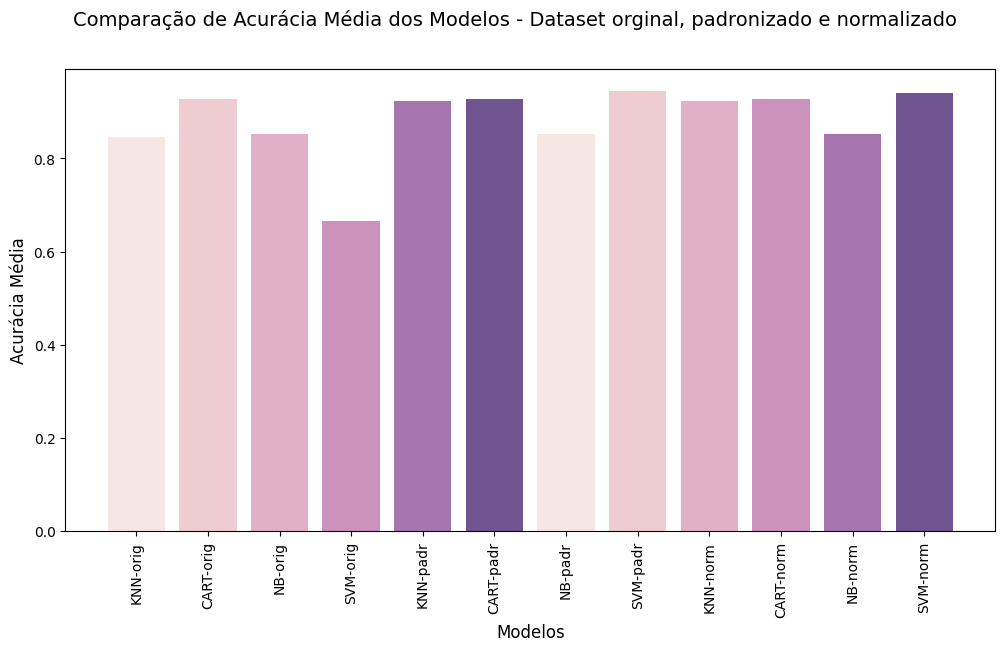

In [18]:
np.random.seed(10)

#definindo os tipos de modelos que serão avaliados e criando uma lista com eles

knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())

models = [knn, cart, naive_bayes, svm]

#Steps para o pipeline usando dados padronizados e normalizados
standard_scaler = ('StandardScaler', StandardScaler()) 
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

scalers = [standard_scaler, min_max_scaler]

#Tipos de datasets que serão avaliados
dataset_types = ['original', 'padronizado', 'normalizado']

#Cria um pipeline para cada modelo e tipo de dataset
pipelines = create_pipelines(models, scalers, dataset_types)

results, names = evaluate(pipelines, X_train, y_train, kfold, scoring)

# Gráfico de barras com a comparação dos modelos
means = [np.mean(result) for result in results]
fig = plt.figure(figsize=(12, 6))
cube_palette = sns.cubehelix_palette(gamma=.5)
plt.bar(names, means, color=cube_palette)
fig.suptitle('Comparação de Acurácia Média dos Modelos - Dataset orginal, padronizado e normalizado', fontsize=14)
plt.xlabel('Modelos', fontsize=12)
plt.xticks(rotation=90)
plt.ylabel('Acurácia Média', fontsize=12)
plt.show()

- O modelo de Arvore de decisão foi o que se saiu melhor, apresentando alta acurácia e baixo desvio padrão.
- Os modelos K-nearest neighbors e Naive Bayes tiveram bons resultados e bem próximos. Naive Bayes é um modelo conhecido por lidar bem com datasets em que os dados tem baixa correlação, o que pôde ser visto na matriz de correlação mostrada anteriormente, uma vez que ele as desconsidera.
- SVM apresentou uma performance muito abaixo dos demais, indicando que provavelmente o modelo não conseguiu capturar bem as divisões entre as classes dos dados, necessitando talvez de ajustes no kernel e na rigidez da margem.

Modelagem: Otimização de Hiper parâmetros

In [19]:
#Definição dos parâmetros para o GridSearch
param_grids = {
            'KNN': {
                'KNN__n_neighbors': [3, 5, 7, 9, 11],
                'KNN__metric': ['euclidean', 'manhattan', 'minkowski'],
                'KNN__weights': ['uniform', 'distance']

            },
            'CART': {
                'CART__criterion': ['gini', 'entropy'],
                'CART__max_depth': [None, 10, 20, 30],
                'CART__min_samples_split': [2, 5, 10],
                'CART__min_samples_leaf': [1, 2, 4]
            },
            'NB': {
                'NB__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
            },
            'SVM': {
                'SVM__C': [0.1, 1, 10],
                'SVM__kernel': ['rbf', 'linear', 'poly']
            }
        }

for name, model in pipelines:
    model_name = name.split('-')[0]
    gs = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=kfold, scoring=scoring)
    gs.fit(X_train, y_train)
    print(f'Melhor parâmetro para o modelo {name}: {gs.best_params_} com acurácia de {gs.best_score_}')

Melhor parâmetro para o modelo KNN-orig: {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 7, 'KNN__weights': 'distance'} com acurácia de 0.8662941796046786
Melhor parâmetro para o modelo CART-orig: {'CART__criterion': 'entropy', 'CART__max_depth': 20, 'CART__min_samples_leaf': 2, 'CART__min_samples_split': 10} com acurácia de 0.9394716033954934
Melhor parâmetro para o modelo NB-orig: {'NB__var_smoothing': 1e-09} com acurácia de 0.8528532105487934
